In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, mean_squared_error, mean_absolute_error
import joblib

Load the downloaded CSV file of "California Housing Prices" as a Pandas dataframe

In [8]:
housing = pd.DataFrame(pd.read_csv('housing.csv'))

## Perform necessary data cleaning, processing and feature engineering to prepare the data for modeling

### I want to get an overview of all the dataset

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.shape

(20640, 10)

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### I want to check for categorical and numerical variables

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### I want to check and get rid of records with nulls if they are not many compared to the entire dataset

In [13]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
housing = housing.dropna()

In [15]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
housing.shape

(20433, 10)

### I want to get rid of any order the dataset may have

In [17]:
housing_shuffled = housing.sample(n=len(housing))
housing_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7762,-118.10,33.91,36.0,1080.0,201.0,719.0,201.0,4.2679,175800.0,<1H OCEAN
6136,-117.99,34.08,35.0,1032.0,207.0,954.0,191.0,2.8906,134800.0,INLAND
1025,-120.56,38.48,14.0,3545.0,702.0,946.0,411.0,3.4609,120900.0,INLAND
10854,-117.87,33.69,4.0,2337.0,768.0,983.0,655.0,3.7174,275000.0,<1H OCEAN
19846,-119.10,36.40,23.0,1885.0,363.0,1056.0,338.0,3.2159,92800.0,INLAND


### I want to know if the categorical variable may have an influence on the price

In [18]:
ocean = housing_shuffled.ocean_proximity
ocean.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

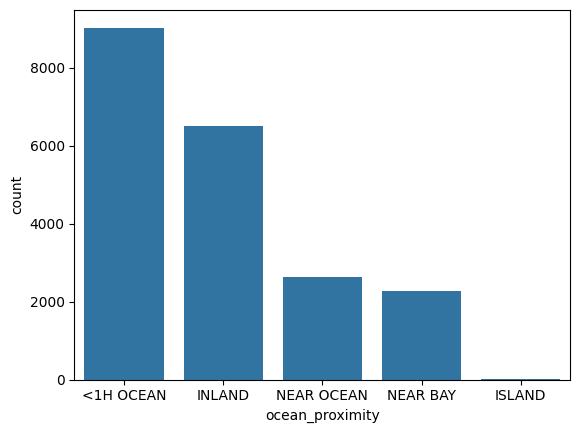

In [20]:
sns.barplot(ocean.value_counts())

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

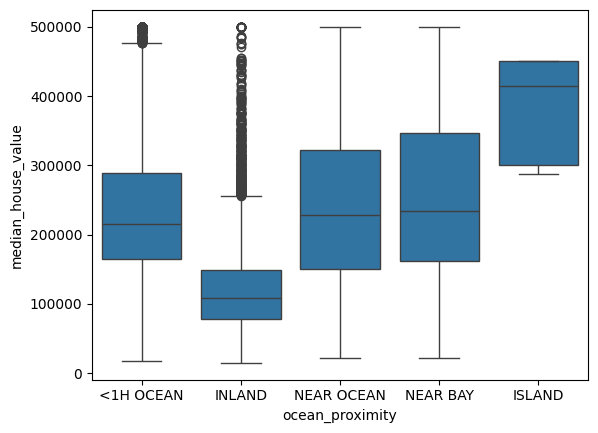

In [21]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_shuffled)

### I want to include ocean_proximity in my prediction using a transformation for categorical values

In [22]:
pd.get_dummies(housing_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7762,True,False,False,False,False
6136,False,True,False,False,False
1025,False,True,False,False,False
10854,True,False,False,False,False
19846,False,True,False,False,False


In [23]:
housing_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7762,-118.10,33.91,36.0,1080.0,201.0,719.0,201.0,4.2679,175800.0
6136,-117.99,34.08,35.0,1032.0,207.0,954.0,191.0,2.8906,134800.0
1025,-120.56,38.48,14.0,3545.0,702.0,946.0,411.0,3.4609,120900.0
10854,-117.87,33.69,4.0,2337.0,768.0,983.0,655.0,3.7174,275000.0
19846,-119.10,36.40,23.0,1885.0,363.0,1056.0,338.0,3.2159,92800.0


In [24]:
housing_complete = pd.concat([housing_shuffled.drop('ocean_proximity', axis=1), pd.get_dummies(housing_shuffled['ocean_proximity'])], axis=1)
housing_complete

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7762,-118.10,33.91,36.0,1080.0,201.0,719.0,201.0,4.2679,175800.0,True,False,False,False,False
6136,-117.99,34.08,35.0,1032.0,207.0,954.0,191.0,2.8906,134800.0,False,True,False,False,False
1025,-120.56,38.48,14.0,3545.0,702.0,946.0,411.0,3.4609,120900.0,False,True,False,False,False
10854,-117.87,33.69,4.0,2337.0,768.0,983.0,655.0,3.7174,275000.0,True,False,False,False,False
19846,-119.10,36.40,23.0,1885.0,363.0,1056.0,338.0,3.2159,92800.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,-118.44,34.02,32.0,2242.0,490.0,921.0,461.0,4.0429,500001.0,True,False,False,False,False
13218,-117.68,34.00,5.0,3761.0,580.0,2335.0,648.0,5.7338,225400.0,False,True,False,False,False
1595,-122.09,37.89,35.0,880.0,139.0,352.0,132.0,6.8686,406500.0,False,False,False,True,False
14910,-117.05,32.61,31.0,4033.0,715.0,2585.0,715.0,3.5096,139900.0,False,False,False,False,True


In [25]:
housing_complete = housing_complete[['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms', 'population', 
                                     'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 
                                     'median_house_value']]
housing_complete

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
7762,-118.10,33.91,36.0,1080.0,201.0,719.0,201.0,4.2679,True,False,False,False,False,175800.0
6136,-117.99,34.08,35.0,1032.0,207.0,954.0,191.0,2.8906,False,True,False,False,False,134800.0
1025,-120.56,38.48,14.0,3545.0,702.0,946.0,411.0,3.4609,False,True,False,False,False,120900.0
10854,-117.87,33.69,4.0,2337.0,768.0,983.0,655.0,3.7174,True,False,False,False,False,275000.0
19846,-119.10,36.40,23.0,1885.0,363.0,1056.0,338.0,3.2159,False,True,False,False,False,92800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,-118.44,34.02,32.0,2242.0,490.0,921.0,461.0,4.0429,True,False,False,False,False,500001.0
13218,-117.68,34.00,5.0,3761.0,580.0,2335.0,648.0,5.7338,False,True,False,False,False,225400.0
1595,-122.09,37.89,35.0,880.0,139.0,352.0,132.0,6.8686,False,False,False,True,False,406500.0
14910,-117.05,32.61,31.0,4033.0,715.0,2585.0,715.0,3.5096,False,False,False,False,True,139900.0


### I want to know the degree of influence all the numeric variables may have on the target variable

In [26]:
housing_numeric = housing_complete.select_dtypes('number')
correlation_matrix = housing_numeric.corr()
correlation_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

### I want to see the distribution of the variable that is more correlated to the target

<Axes: xlabel='median_income'>

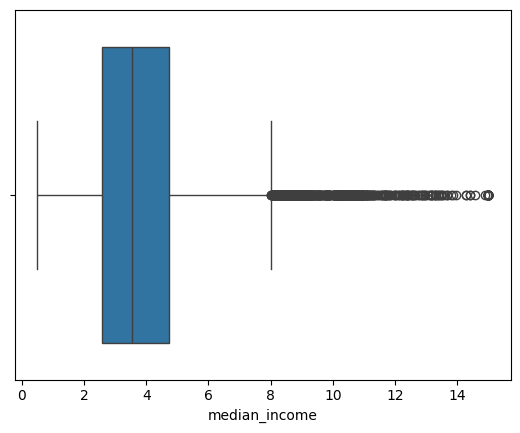

In [27]:
sns.boxplot(x=housing_complete['median_income'])

### I want to see also the correlation of the more correlated variables

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

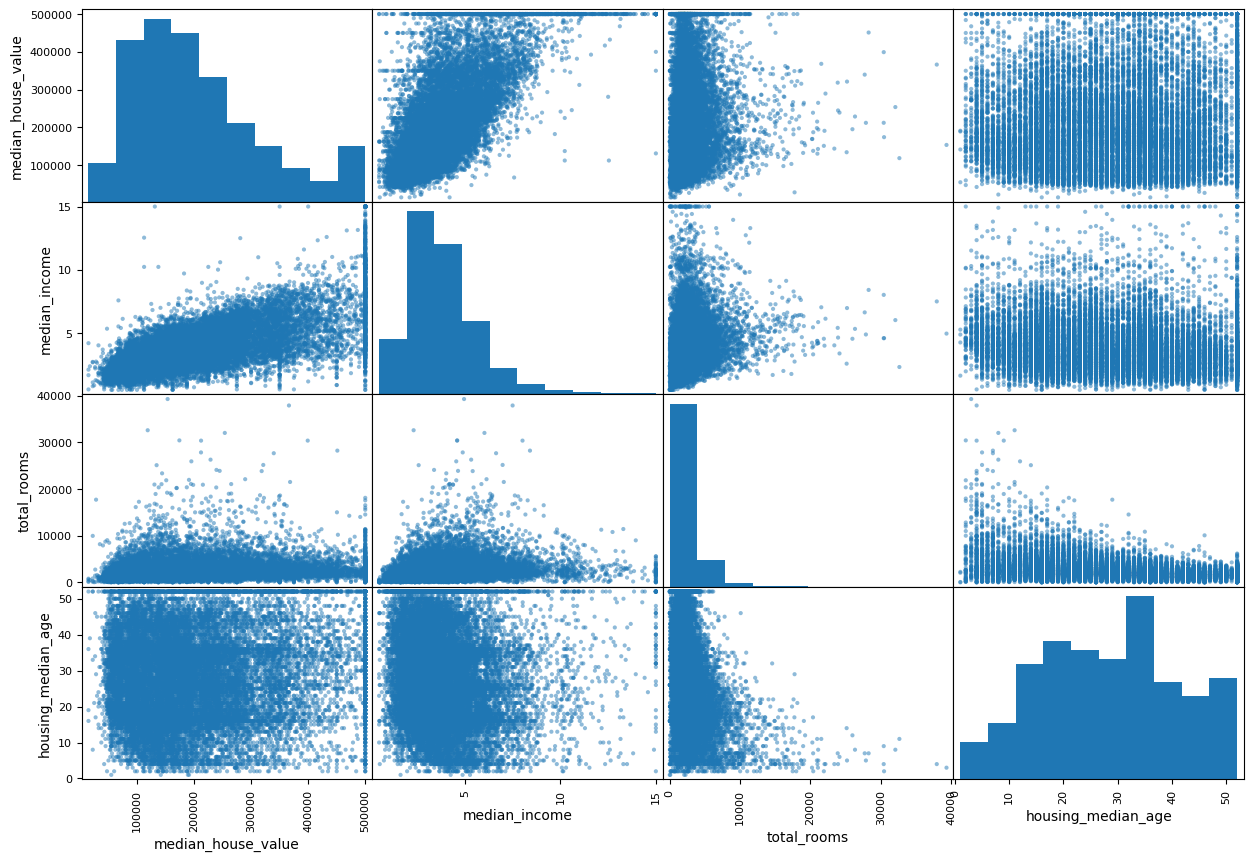

In [28]:
from pandas.plotting import scatter_matrix
features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_complete[features], figsize=(15,10))

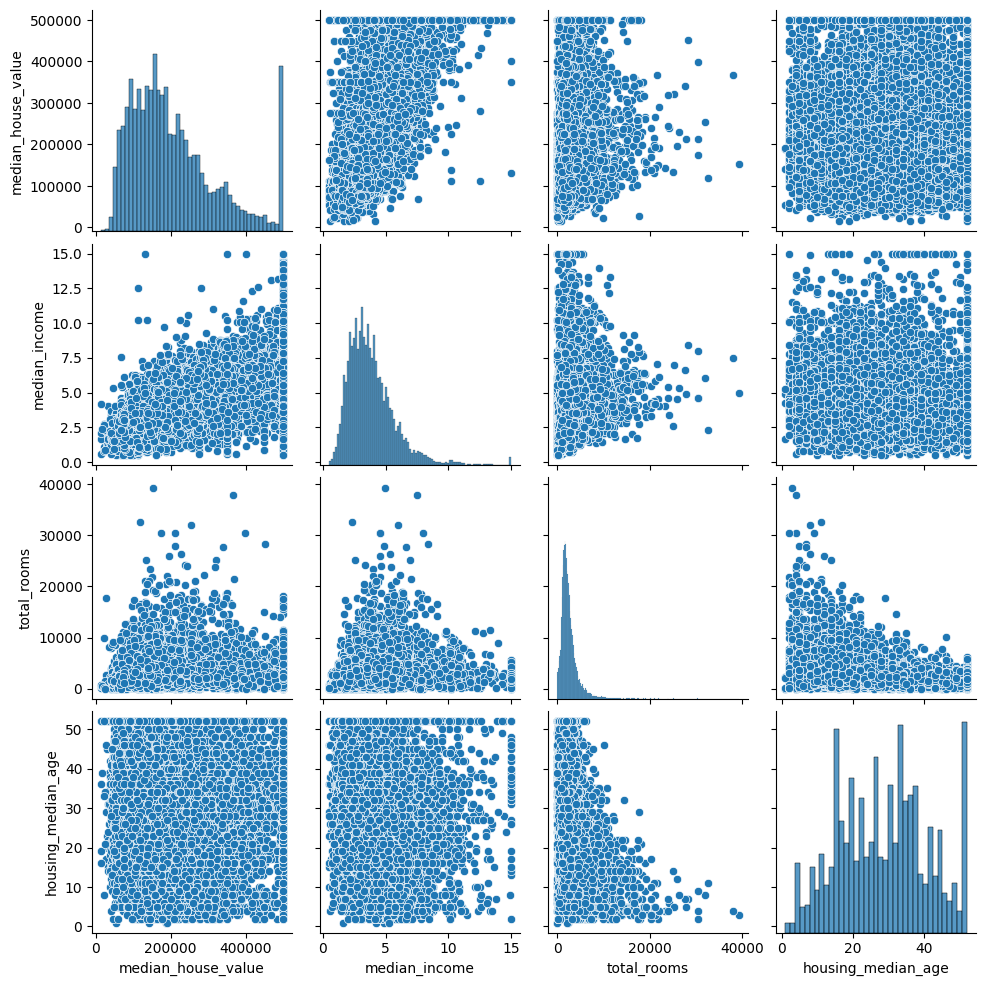

In [29]:
sns.pairplot(housing_complete[features])

### I want to create an initial model without any scaling or geospatial relation (only transforming ocean_proximity)

In [30]:
X = housing_complete.drop(['median_house_value'], axis = 1)

In [31]:
y = housing_complete['median_house_value']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
print('Training Score ', model.score(X_train, y_train))
print('Testing Score ', model.score(X_test, y_test))

Training Score  0.6470015289351299
Testing Score  0.6440221833279731


In [49]:
print('r2 score ', r2_score(y_pred, y_test))

r2 score  0.43896590769380783


In [57]:
print('mean absolut error ', mean_absolute_error(y_test, y_pred))

mean absolut error  49484.57268566843


In [59]:
print('mean squared error ', mean_squared_error(y_test, y_pred))

mean squared error  4636037267.949075


In [60]:
joblib.dump(model, 'model.joblib')

['model.joblib']